<a href="https://colab.research.google.com/github/chaosagent86/machine_learning/blob/main/Abschlussprojekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Abschlussprojekt**
**Bearbeitende:**
*   Baier, Sebastian
*   Figlmüller, Magdalena

## **Allgemeine Angaben**

```
The goal: Use a group-dependent subset of the well known mnist data-set
to train and compare two models which do a binary classification.

To get the group-specific data set you need two numbers
1. the group number, which is the 6 digit number obtained by concatenating
the last three digits of the group members student IDs and use
this group number.
2. the group digit which is the third digit of your group number.
```

Daraus ergibt sich:

*   Baier: 2310542002 --> 002
*   Figlmüller: 2310542017 --> 017

**Gruppennummer:** 002017  
**Gruppenziffer:** 2

## **Aufgabe 1.1 - SGD Classifier**

```
1. Work through the provided code and explain the model. In particular
explain what the SGD-Classifier does/ how it works? If helpful, extend
the code to clarify what is the concept of the model, what it predicts,
etc. Finally explain the model evaluation.
```

Entsprechend dieser Angabe wird in den nachfolgenden Abschnitten kurz der SGD Classifier erklärt, gefolgt von einer Schritt-für-Schritt Beschreibung der einzelnen Code-Abschnitte.

### Kurzbeschreibung: SGD Classifier

Der SGD Classifier verwendet den sogenannten **S**tochastic **G**radient **D**escent (SGD) Algorithmus - einen relativ einfachen aber effizienten Ansatz, Daten zu klassifizieren. Dieser Classifier ist insbesondere bei großen Datensätzen nützlich, z.B. für Text Klassifizierung oder Prozessierung natürlicher Sprache, sofern die Daten inkrementell verarbeitet werden können.

Bei *Gradient Descent* handelt es sich um ein Optimierungsverfahren, das die Parameter eines Modells nach und nach aktualisiert und dabei die sogenannte Verlustfunktion minimiert. Hierbei kann es sich beispielsweise um die Parameter einer linearen Regression handeln. Die Verlustfunktion misst, wie gut das Modell die Trainingsdaten vorhersagt.

Bei einem traditionellen Gradient Descent wird der entsprechende Gradient über den kompletten Datensatz berechnet und erst danach geändert. *Stochastic* bedeutet in diesem Zusammenhang, dass die Trainingsparameter nach jeder einzelnen Trainingsbeobachtung/jedem Mini-Batch aktualisiert werden. Dadurch werden häufiger Updates durchgeführt, was insbesondere bei großen Datensätzen die Effizienz steigern kann.

Der SGD Classifier verwendet üblicherweise entweder eine logistische Regression oder Support Vector Machines, um Modelle zu trainieren.

Basierend auf dieser Quelle:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier

und dem folgenden Code-Abschnitt:

```
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_2)
```
greifen die Standardparameter. In dem uns bereitgestellten Code wäre der loss="hinge", wobei hinge für eine lineare Support Vector Machine (SVM) steht. Es wird also in unserem SGD Classifier eine SVM für das Training verwendet.

Im Allgemeinen erfolgen folgende Schritte, um das Modell zu trainieren:

1.   Die Trainingsdaten und Testdaten werden erzeugt bzw. entsprechend aufgesplittet.
2.   Die Modellparameter werden initialisiert.

1.   Der Algorithmus durchläuft die Trainingsdaten mehrmals und berechnet in jeder Iteration die Gradienten der Verlustfunktion hinsichtlich der Modellparameter.
2.   Nach jeder einzelnen Trainingsbeobachtung werden die Modellparameter aktualisiert.

1.  Dieser Prozess (Schritt 3 und 4) wird wiederholt, bis entweder das Maximum an Iterationen erreicht ist oder die Verlustfunktion einen festgelegten Schwellenwert unterschreitet.

Zur Evaluierung des Modells können die Confusion Matrix und der Accuracy Score verwendet werden. Die Confusion Matrix demonstriert wie gut die Klassifizierung insgesamt funktioniert, indem sie anzeigt welche Klassen häufig falsch und welche korrekt klassifiziert werden.

Der Accuracy Score gibt den Anteil der korrekt vorhergesagten Beobachtungen an und bietet einen schnellen Überblick über die Modellleistung.

Zusätzlich kann ein Classification Report erstellt werden, der detaillierte Informationen über die Genauigkeit, Robustheit und Datenverteilung des Modells liefert.

### Setup des Python-Projektes

Der folgende Code lädt die notwendigen Pakete, insbesondere sklearn, das für maschinelles Lernen wichtig ist. Weitere wichtige Pakete sind sys, numpy, os und matplotlib.

*   **sys**: dient der Konfiguration von Python selbst
*   **sklearn**: ein mittlerweile 'deprecated' Paket zur Verwendung von Machine Learning Algorithmen (Vergleich: https://pypi.org/project/sklearn/); *Aktuell wäre hier scikit-learn*
*   **numpy**: relevant für die Arbeit mit Arrays innerhalb von Python
*   **matplotlib**: Package zur Erstellung statischer, animierter und interaktiver Visualisierungen in Python

Relevant ist an dieser Stelle ebenfalls, ob mit der korrekten Python Version (>= 3.5) gearbeitet wird, ob es sich um ein Google Colab oder ein Kaggle Dokument handelt sowie die Überprüfung der sklearn Version (>= 0.20).

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Im nächsten Codeabschnitt werden Parameter wie Bildabmessungen und Schriftgrößen sowie diverse Verzeichnisse festgelegt. Zudem wird die Funktion *save_fig* definiert, um erstellte Grafiken zu speichern.

In [ ]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### MNIST (Modified National Institute of Standards and Technology database)

Der MNIST Datensatz wird mit der Funktion *fetch_openml()* von OpenML geladen (siehe https://www.openml.org/search?type=data&sort=runs&id=554&status=active) und enthält 784 Features, 60.000 Trainingsbeispiele und ein Testset von 10.000 Datenpunkten.

Die Bilder sind 28x28 Pixel groß. Mit *np.random.choice* wird ein Test-Datensatz festgelegt, der dann mit den Zeilen:

```
X = mnist.data[indices]
y = mnist.target[indices]
```

geladen wird. Die Funktion *mnist.keys()* zeigt die Schlüssel des Datensatzes an, was dabei helfen kann, den Datensatz besser zu verstehen.

In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', as_frame=False)

mnist

# Set the random seed
np.random.seed(2017) #002017 does not work!

# Get indices for random selection
indices = np.random.choice(mnist.data.shape[0], 10000, replace=False)

# Select subset using the indices
# mnist = mnist[indices]
X = mnist.data[indices]
y = mnist.target[indices]
mnist.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Die folgenden zwei Codeblöcke (X.shape sowie y.shape) geben die Dimensionen der Daten aus. Dies dient zur Überprüfung, ob der Datensatz korrekt geladen wurde. Die Feature-Anzahl und die Anzahl der Datensätze welche mittels *np.random.choice()* geladen wurden passt mit den Recherche-Werten zusammen.

In [ ]:
X.shape

(10000, 784)

In [ ]:
y.shape

(10000,)

*%matplotlib inline* stellt sicher, dass Diagramme in Google Colab oder Jupyter Notebooks angezeigt werden. Der erneute Import von matplotlib scheint redundant zu sein, da dies bereits am Anfang erfolgt ist.

X ist ein Array. Mit:
```
some_digit = X[1]
```
wird das erste (nicht nullte) Element von X in some_digit gespeichert. Dieses wird auf 28x28 Pixel reskaliert und in some_digit_image gespeichert. Mit *plt.imshow* wird das Bild schließlich angezeigt.

Die Funktion:

```
plt.axis("off")
```

verhindert die Anzeige der x- und y-Achsen. Dieser Codeblock dient nur zur Visualisierung, um zu überprüfen, ob die Daten korrekt geladen wurden. Daher ist es egal, welcher Wert an dieser Stelle in X bzw. some_digit eingelesen wird.




Saving figure some_digit_plot


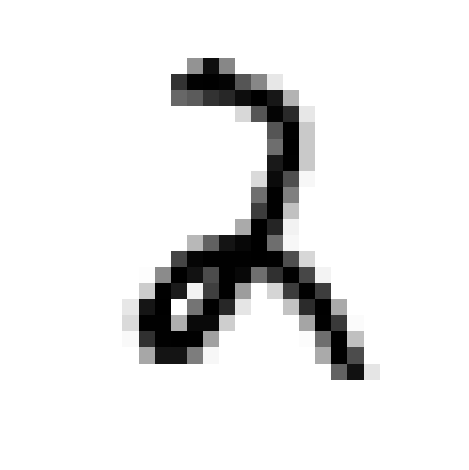

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[5]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In y befindet sich hingegen die korrekte Klassifizierung des Bildes, nicht das Bild selbst:

In [ ]:
y[2]

'0'

y wird in einen unsigned integer mit 8 Bit Länge gecastet:

In [ ]:
y = y.astype(np.uint8)

Danach wird der Datensatz in einen Trainings- und Testdatensatz aufgeteilt. Dabei sollen die ersten 8.000 Datensätze für das Training und die restlichen 2.000 für das Testen verwendet werden. Dies entspricht einer 80-20 Aufteilung:

In [ ]:
X_train, X_test, y_train, y_test = X[:8000], X[8000:], y[:8000], y[8000:]

### Training des binären Klassifikators

An dieser Stelle wird der Original-Code entsprechend der Aufgabenstellung weiter bearbeitet. Im Original-Code steht hier folgendes:
```
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
```
Dies bedeutet, dass auf der rechten Seite *y_train == 5* die Zielziffer auf fünf gesetzt wird und diese für das Training herangezogen wird.

Laut Aufgabenstellung ist unsere Gruppenziffer allerdings die Zahl **zwei (2)**. Um potenzielle Missverständnisse hinsichtlich des Codes zu vermeiden, werden nicht nur die Zuweisungen angepasst, sondern auch sämtliche Variablennamen entsprechend umbenannt.

In [ ]:
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

In [ ]:
y_train_2[y_train_2 == True]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Nachdem wir unseren Trainings- und Testdatensatz erstellt haben, laden wir nun den SGD Classifier aus dem Paket sklearn.linear_model.

Wir erstellen ein Objekt sgd_clf der Klasse SGDClassifier und übergeben ihm verschiedene Parameter, die wie folgt interpretiert werden können:

*   **max_iter=1000**: gibt die maximale Anzahl an Iterationen an, die der Algorithmus durchlaufen soll. In unserem Fall sind das 1000.
*   **tol_1e-3**: legt die Toleranz für die Konvergenz fest. Wenn die Änderung der loss-Funktion (=Verlustfunktion) zwischen den einzelnen Iterationen kleiner als dieser Wert ist, wird das Training gestoppt.
*   **random_state=42**: ähnlich *seed()* dient dies dazu, die Ergebnisse reproduzierbar zu machen.

Anschließend erfolgt das eigentliche Training über die Funktion *sgd_clf.fit*. Hier erhält der Classifier über X_train die Bilder und über y_train_2 die Klassifikation bzw. die entsprechenden Labels. Nach einiger Zeit sollte ein Modell erstellt sein, das sich über die Iterationen immer weiter angepasst hat.

Gemäß der Quelle https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
handelt es sich beim SGD Classifier um einen linearen Classifier, der regularisierte lineare Modelle verwendet. Dies beinhaltet eine dynamische Implementierung von LASSO und Ridge-Algorithmen, die helfen, die Anzahl der Features zu reduzieren und das Modell weniger komplex zu machen. Dadurch wird das Risiko von Overfitting verringert oder idealerweise komplett vermieden. Im LASSO-Verfahren können Features komplett entfallen (Beta = Null), während bei Ridge die Beta-Werte gegen Null tendieren, aber nicht genau null werden.

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_2)

SGDClassifier(random_state=42)

Oben haben wir die Variable *some_digit* initialisiert. Hier wird der Classifier verwendet um zu prüfen, ob ein Bild, das in *some_digit* gespeichert ist, der Ziffer entspricht, für die wir das Modell erstellt haben. In unserem Fall sollte bei der Ziffer 2 idealerweise immer 'True' erscheinen und andernfalls 'False':

In [ ]:
sgd_clf.predict([some_digit])

array([ True])

Hier wird das Modul *cross_val_score* aus *sklearn.model_selection* geladen. Eine Cross-Validation wird verwendet, um herauszufinden, wie gut das Modell arbeitet. Es wird eine dreifache Cross-Validation durchgeführt, was am Parameter *cv=3*erkennbar ist. Dabei wird der Datensatz in drei Teile aufgeteilt: Zwei Teile werden für das Training verwendet und einer für das Testen. Entsprechend erhalten wir drei Werte für die Accuracy, die angibt, wie genau das Modell gearbeitet hat, also den Prozentsatz der korrekt klassifizierten Ziffern. Standardmäßig liegt der Wert bei *cv=5* liegt, daher sorgen wir in diesem Fall dafür, dass die Subsets etwas größer sind.

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_2, cv=3, scoring="accuracy")

array([0.96662917, 0.95388076, 0.96661665])

### Maßnahmen zur Leistungssteigerung

#### *Messung der Accuracy unter Verwendung der Cross-Validation*

Auch hier werden wieder neue Module des Pakets sklearn nachgeladen.
Konkret das Modul 'clone' aus sklearn.base sowie das Modul StratifiedKFold aus 'sklearn.model_selection'.
Gemäß der Webseite
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
handelt es sich hierbei um einen "Stratified K-Fold Cross-Validator".
Ziel ist es laut https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold, die Test- und Trainingssets aufzuteilen, wobei sowohl die Größe der Samples als auch die Verteilung der Klassen in jedem Fold dem kompletten Datensatz entsprechen.

Die Variablen sind hierbei wie folgt zu interpretieren:
* **n_splits=3**: Anzahl der Folds (n=3). Ein Fold ist ein Teil des Datensatzes, wobei darauf geachtet wird, dass die Klassen gleichmäßig zwischen den Folds verteilt sind.
* **shuffle=True**: Legt fest, ob die Daten vor dem Aufteilen zufällig durchmischt werden sollen. Hier ist dies der Fall (=True).
* **random=42**: Ähnlich wie "seed" stellt dies sicher, dass die Ergebnisse reproduzierbar bleiben.

Anschließend erfolgt eine Iteration über die erstellten Folds, die zuvor in StratifiedKFold festgelegt wurden.
*Clone()* stellt sicher, dass jedes Mal eine Kopie des SGDClassifiers erstellt wird, sodass jedes Modell unabhängig trainiert wird und keines übermäßig stark trainiert wird.

Anschließend erfolgt die Extraktion der Trainingsdaten und der zugehörigen Labels. Mit clone_clf.fit wird das aktuelle Modell des aktuellen Folds trainiert und mit clone_clf.predict werden Vorhersagen basierend auf diesem Modell gemacht. Die korrekten Vorhersagen werden gezählt und über print ausgegeben.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_2):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_2[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_2[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9670041244844394
0.9351331083614548
0.9624906226556639


**Note**: `shuffle=True` was omitted by mistake in previous releases of the book.

Im nächsten Schritt wird BaseEstimator aus der Package sklearn.base importiert. Hier wird eine besondere Funktion innerhalb der Klasse 'Never2Classifier' erstellt: der Funktion *fit()* werden zwar die Bilddaten übergeben,  jedoch nicht die dazugehörigen Labels, die stattdessen immer als "None" gekennzeichnet werden. Zudem tut die Funktion schlicht nichts - sie enthält keinen Inhalt und das Schlüsselwort 'pass' dient als Platzhalter.

Gleiches gilt für die Funktion *predict()*. Diese gibt immer den Wert 'False' zurück.

In [ ]:
from sklearn.base import BaseEstimator
class Never2Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

Bemerkenswert ist an dieser Stelle die noch vergleichsweise hohe "Trefferquote".

In [ ]:
never_2_clf = Never2Classifier()
cross_val_score(never_2_clf, X_train, y_train_2, cv=3, scoring="accuracy")

array([0.8983877 , 0.89613798, 0.89722431])

#### *Confusion Matrix*

Mithilfe von Kreuzvalidierung werden in diesem Abschnitt Vorhersagen für jeden Datenpunkt generiert:

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3)

Anschließend wird eine Confusion-Matrix erstellt:

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_2, y_train_pred)

array([[7039,  139],
       [ 162,  660]])

Eine Confusion-Matrix stellt hier True-Positives, True-Negatives, False-Positives und False-Negatives gegenüber. Unter der Annahme einer perfekten Vorhersage des richtigen Labels würde die Confusion Matrix wie folgt aussehen (theoretisches Schema):

In [ ]:
                  Predicted
                 Positive   Negative
Actual    Positive   TP         0
          Negative   0          TN


Legende zum Schema:

    TP (True Positive): Korrekt vorhergesagte positive Fälle.
    TN (True Negative): Korrekt vorhergesagte negative Fälle.
    FP (False Positive): Fälle, die fälschlicherweise als positiv vorhergesagt wurden.
    FN (False Negative): Fälle, die fälschlicherweise als negativ vorhergesagt wurden.

In einer perfekten Vorhersage wären alle True-Positives und True-Negatives korrekt vorhergesagt, daher wären die Werte in der Confusion-Matrix für FP und FN jeweils 0.

In [ ]:
y_train_perfect_predictions = y_train_2  # pretend we reached perfection
confusion_matrix(y_train_2, y_train_perfect_predictions)

array([[7178,    0],
       [   0,  822]])

#### *'Precision' und 'Recall'*

Hier werden die Precision und der Recall berechnet.
Die Precision zeigt an, wieviel Prozent der Daten korrekt vorhergesagt wurden und ist ein Qualitätsmerkmal. Der Recall (= die Trefferquote) ist eher eine Art Messung der Quantität, nämlich die Fähigkeit des Klassifikators, alle positiven Proben zu finden.

An erster Stelle wurde hier die Precision mithilfe einer bereitgestellten Funktion berechnet. Die dafür notwendige Formel ist TP/(TP+FP)

https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

In [ ]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_2, y_train_pred)

0.8260325406758448

In [ ]:
cm = confusion_matrix(y_train_2, y_train_pred)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8260325406758448

Daraufhin wurde der Recall (die Trefferquote) berechnet. Der beste Wert ist 1 und der schlechteste Wert ist 0.
Dieser Wert wird mithilfe der Formel TP/(TP+FN) bzw. True Positives / (True Positives + False Negatives) berechnet.

In [ ]:
recall_score(y_train_2, y_train_pred)

0.8029197080291971

In [ ]:
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.8029197080291971

Der anschließend berechnete F1-Score ist der harmonische Mittelwert aus Precision und Recall; siehe: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

Berechnet wird dieser durch 2xTP/(2xTP+FP+FN) bzw. 2x True Positives / (2x True Positives + False Positives + False Negatives).

Der beste Wert liegt bei 1 und der schlechteste bei 0. Mit 0.81 ist unser Modell zwar gut, aber noch weit entfernt von perfekt.


In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train_2, y_train_pred)

0.8143121529919803

In [ ]:
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.8143121529919802

#### *Die Receiver-Operating-Characteristic (ROC) Kurve*

Die Receiver Operating Characteristic Curve (ROC-Kurve) dient der Beurteilung der Qualität von Klassifizierungsmodellen. Sie ermöglicht es, verschiedene Schwellenwerte zu vergleichen und deren Auswirkung auf die Gesamtleistung des Modells zu untersuchen. Dabei wird speziell der Kompromiss zwischen der True Positive Rate (TPR) und der False Positive Rate (FPR) betrachtet.

Ein Klassifizierungsmodell gibt in der Regel eine Wahrscheinlichkeit zurück, ob ein Label als "erkannt" gelten soll oder nicht. Mithilfe von Schwellenwerten können wir festlegen, wie sensibel unser System sein soll, ab wann also das Label als erkannt betrachtet werden soll. In einem "perfekten" Modell wäre die True Positive Rate 100% (bzw. 1) und die False Positive Rate bei 0. In der ROC-Kurve würde dieser Punkt ganz links oben liegen.

Die Funktion *decision_function()* liefert ein Numpy-Array, das angibt, auf welcher Seite des Entscheidungshyperplanes eine Probe liegt und wie weit entfernt sie davon ist. Basierend auf diesen Werten kann die Funktion *predict* entscheiden, ob ein Label vergeben wird, oder das Beispiel stattdessen als "nicht erkannt" klassifiziert wird.

In [ ]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([179396.9324454])

Anschließend wird gezeigt, wie unterschiedliche Schwellenwerte das Ergebnis beeinflussen (können):

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_some_digit_pred

array([ True])

In [ ]:
threshold = -300000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

Nachfolgend findet eine dreifache Kreuzvalidierung statt (cv=3). Diesmal wird jedoch *method=decision_function"* verwendet, was bedeutet, dass nicht das Label (method="predict") als Ausgabe erscheint, sondern die oben beschriebenen "Entscheidungsergebnisse" zurückgegeben werden. Diese entsprechen den Werten, die anzeigen, wie weit eine Probe von der Entscheidungsgrenze entfernt liegt, von negativen bis positiven Werten.

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3,
                             method="decision_function")

In [ ]:
y_scores

array([-371503.95322749, -972902.07769463, -180177.73511482, ...,
       -194691.13775466, -330610.52427932, -297969.2203733 ])

Schließlich erfolgt die Ausgabe der ROC-Kurve:

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_2, y_scores)

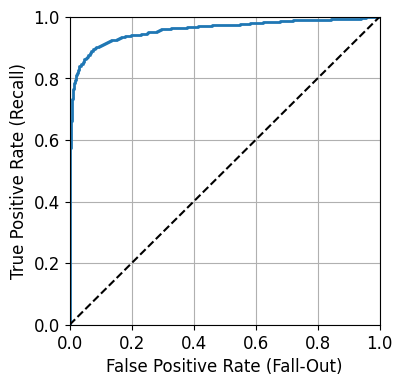

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.grid(True)

plt.figure(figsize=(4, 4))
plot_roc_curve(fpr, tpr)

Der nachfolgend berechnete Wert ist das Integral der Kurve bzw. die Fläche unterhalb der Kurve. Ein perfektes Modell hätte die Fläche 1.0:

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_2, y_scores)

0.9576237950645355

#### *Classification Report*

Beim nachfolgenden Classification Report fällt auf, dass die Precision, der Recall und der F1-Score bei der Klassifizierung von "False" (also Ziffern, die nicht der Zahl Zwei entsprechen) deutlich besser sind als bei der korrekten Klassifizierung von "True" (also der Ziffer Zwei).  Das Modell tut sich also leichter zu widerlegen, dass es sich um die Ziffer 2 handelt, als diese korrekt zu erkennen.

Der Report zeigt auch, dass wir insgesamt 7178 Bilder haben, die nicht die Zahl Zwei darstellen, während nur 822 Bilder tatsächlich die Ziffer Zwei zeigen. Möglicherweise ist dies ein Grund für die deutlich bessere Performance bei der Klassifizierung von "False".

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train_2, y_train_pred))

              precision    recall  f1-score   support

       False       0.98      0.98      0.98      7178
        True       0.83      0.80      0.81       822

    accuracy                           0.96      8000
   macro avg       0.90      0.89      0.90      8000
weighted avg       0.96      0.96      0.96      8000



## **Aufgabe 1.2 - CNN**

```
2. Extend the provided notebook and apply a Convolutional Neural Network
(CNN) to the same binary classification task. There are many
online tutorials for the Mnist dataset with CNNs - pick any of those and
adapt them to your groups data set and the binary classification task.
Experiment a bit with some of the hyper-parameters of the used model,
explain what your model does (indicate how CNNs work, no details are
necessary but feel free to add them) and what hyper-parameters you
have picked.
```
Gewähltes CNN Tutorial: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/


### Kurzbeschreibung: Convolutional Neural Networks (CNN)

Convolutional Neural Networks (CNN) stellen eine spezielle Art von neuronalen Netzwerken dar. Da CNNs für die Verarbeitung von Bildern und Videos besonders gut geeignet sind, ist deren Einsatz für die Analyse des MNIST Datensatzes ideal.

CNNs bestehen aus mehreren Schichten, von denen jede eine spezifische Aufgabe hat, darunter:
*   Convolutional Layer (Faltungsschicht): Extrahiert Merkmale wie Kanten, Ecken und Texturen aus den Bildern.
*   Pooling Layer (Pooling Schicht): Reduziert die Dimensionen des Datensatzes, um die Berechnungen zu beschleunigen und gleichzeitig wichtige Merkmale beizubehalten.
*   Fully Connected Layer (vollständig verbundene Schicht): Funktioniert ähnlich wie ein herkömmliches neuronales Netzwerk und interpretiert die Ausgabe der vorherigen Schichten, um eine endgültige Entscheidung zu treffen, z.B. ob ein Bild die Ziffer "2" darstellt.

Ein großer Vorteil von CNNs ist, dass sie keine manuellen Extraktionstechniken benötigen, da sie in der Lage sind, relevante Merkmale direkt aus den Rohbildern zu erlernen. Dies macht sie nicht nur für die reine Bilderkennung geeignet, sondern auch für andere Aufgaben wie die Objekterkennung. Die Techniken zur Reduktion der Dimensionalität tragen dazu bei, dass CNNs effizient arbeiten können.


### Vorbereitung: Import von Paketen, Laden und Vorbereiten des Trainings- und Testdatensatzes

Zuerst laden wir die benötigten Pakete bzw. Libraries.
Wir verwenden hierfür Tensorflow, da dieses Paket auf neuronale Netze bzw. Machine Learning im Allgemeinen spezialisiert ist.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import SGD

from matplotlib import pyplot as plt

from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

import numpy as np
from numpy import mean, std

Danach werden Trainings- und Testdatensatz geladen:

In [ ]:
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # convert class vectors to binary class matrices and
    # set the binary classifier so that the group digit (2)
    # is classified as 1 and all other digits as 0
    trainY = np.where(trainY == 2, 1, 0)
    testY = np.where(testY == 2, 1, 0)
    trainY = to_categorical(trainY, 2)
    testY = to_categorical(testY, 2)
    return trainX, trainY, testX, testY

Der Datensatz ist allerdings derzeit noch nicht für die Verwendung in einem CNN geeignet. Die Bilder in unserem Datensatz verwenden für jeden Pixel einen Wert eines unsigned Integers im Bereich von 0 bis 255, was Schwarz und Weiß entspricht.

Um die Bilder für eine höchstmögliche Performance zu transformieren, ist es üblich, sie in ein Graustufen-Format umzuwandeln, wobei die Pixelwerte auf den Bereich von 0 bis 1 skaliert werden. Hierfür wird der Datentyp zunächst in einen float (Gleitkommazahl) geändert und anschließend jeder Pixelwert durch den Maximalwert (255) geteilt:

In [ ]:
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

### Definition des CNN Modells

Unser Modell besteht aus drei Stufen. Die erste Stufe ist ein Layer, der Features wie Kanten und Ecken extrahiert. Danach reduziert ein Pooling-Layer die Daten, und schließlich verwenden wir ein vollständig verbundenes neuronales Netzwerk (Fully Connected Layer) zur Vorhersage bzw. Klassifizierung der Zahl. Die nachfolgenden Zeilen Code erfüllen folgende Funktionen:

* Die Zeile *model = Sequential()* bedeutet, dass die Schichten linear angeordnet sind. *Conv2D(32, (3, 3),...)* steht für einen Convolutional Layer mit einem 3x3-Filter, der bis zu 32 Features erkennen kann.

* Als Aktivierungsfunktion verwenden wir *relu* (Rectified Linear Unit), die alle negativen Werte auf Null setzt, während positive Werte unverändert bleiben.

* *kernel_initializer="he_uniform"* ist die Initialisierungsfunktion für die Filtergewichte. Diese Methode arbeitet gut mit *relu* zusammen, stabilisiert das Training und beschleunigt es.

* Der Parameter *input_shape=(28, 28, 1)* gibt an, dass die Bilder eine Größe von 28x28 Pixeln haben und nur einen Farbkanal besitzen. Dies ist nur für die erste Schicht wichtig.

* Die zweite Schicht *MaxPooling2D(2, 2)* halbiert die Dimensionen der Feature Map, indem sie den maximalen Wert in jedem 2x2 Fenster nimmt.

* Es folgen drei weitere Schichten zur Verfeinerung des Modells, wobei erneut Features extrahiert und gepoolt werden.

* Die *Flatten()*-Funktion wandelt die Feature Map in einen Vektor um, der an das vollständig verbundene neuronale Netzwerk weitergegeben wird.

* Der Fully Connected Layer besteht aus 100 Neuronen und dient der Interpretation der extrahierten Features.

* Ein weiterer Layer mit 2 Neuronen gibt an, ob die Ziffer eine Zwei ist oder nicht. Die Aktivierungsfunktion *softmax* liefert Wahrscheinlichkeitswerte für die Klassifikation.

* Anschließend wird der "Optimizer" *opt = SGD(learning_rate=0.01, momentum=0.9)* mit einer Lernrate von 0.01 und einem Momentum von 0.9 initialisiert. Dieses Setting soll helfen, aus lokalen Minima herauszukommen. Ein Vergleich mit dem SGD Classifier ist an dieser Stelle nicht direkt möglich, da der SGD Classifier stattdessen mit *learning_rate="optimal"* initialisiert wird.

* Abschließend erfolgt die Kompilierung des Modells.

In [ ]:
# define cnn model (lr = learning rate)
def define_model(lr=0.01):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    # 2 nodes as output: 0 (for != 2) and 1 (for == 2)
    model.add(Dense(2, activation='softmax'))
    # compile model
    opt = SGD(learning_rate=lr, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Evaluierung des Modells

Für die Evaluierung verwenden wir eine 5-fache Kreuzvalidierung. Die gesteigerte Menge im Vergleich zum SGD Classifier sollte jedoch keinen großen Einfluss haben, außer dass wir mehr Einblick in die Performance erhalten und das Modell etwas länger für die Berechnungen benötigt.

Der Trainingsdatensatz sowie die Samples werden vor jeder Aufteilung gemischt. Wir trainieren das Modell für 10 Epochen mit einer Standard-Batch-Größe von 32 Beispielen. Der Testdatensatz wird dabei während und nach jedem Durchlauf bewertet, was es uns ermöglicht, die Lernkurve zu erstellen und zu visualisieren. Dadurch können wir auch bis zu einem gewissen Grad erkennen, ob Overfitting auftritt.

Die Daten werden in einer Variable namens 'history' gespeichert, die anschließend zum Plotten der Liniendiagramme verwendet wird.

In [ ]:
# evaluate a model using k-fold cross-validation + provide hyperparameters when calling the function
def evaluate_model(dataX, dataY, n_folds=5, nr_epochs = 10, batch_size=32, lr=0.01):
    scores, histories = list(), list()
    precisions, recalls, f1s, aucs = list(), list(), list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=42)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # define model
        model = define_model(lr)
        # select rows for train and test
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        # fit model
        history = model.fit(trainX, trainY, epochs=nr_epochs, batch_size=batch_size, validation_data=(testX, testY), verbose=0)
        # evaluate model
        _, acc = model.evaluate(testX, testY, verbose=0)
        print('> %.3f' % (acc * 100.0))
        # predict probabilities
        yhat_probs = model.predict(testX, verbose=0)
        if np.any(np.isnan(yhat_probs)):
          print("WARNING: NaN values found in yhat_probs! Thus, NANs in yhat probs set to 0.1")
          yhat_probs = np.nan_to_num(yhat_probs, nan=0.1)
        # predict class labels
        yhat_classes = np.argmax(yhat_probs, axis=1)
        # true class labels
        testY_classes = np.argmax(testY, axis=1)
        # calculate precision, recall, f1 score
        precision = precision_score(testY_classes, yhat_classes)
        recall = recall_score(testY_classes, yhat_classes)
        f1 = f1_score(testY_classes, yhat_classes)
        auc = roc_auc_score(testY, yhat_probs)
        # store scores
        scores.append(acc)
        histories.append(history)
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
        aucs.append(auc)
    return scores, histories, precisions, recalls, f1s, aucs

### Plot der Lernkurven

Mithilfe des nachfolgenden Code-Abschnitts werden zwei Plots erstellt: einer für die Verlustfunktion (Loss) und einer für die Genauigkeit (Accuracy). Die blaue Linie zeigt die Performance auf dem Trainingsdatensatz, während die orangene Linie die Performance auf dem Testdatensatz darstellt.

In [ ]:
def summarize_diagnostics(histories):
		for i in range(len(histories)):
			# plot loss
			plt.subplot(2, 1, 1)
			plt.title('Cross Entropy Loss')
			plt.plot(histories[i].history['loss'], color='blue', label='train')
			plt.plot(histories[i].history['val_loss'], color='orange', label='test')

	 		#no duplicates within the legend
			handles, labels = plt.gca().get_legend_handles_labels()
			by_label = dict(zip(labels, handles))
	 		#put the modified (=no duplicates) legend to the center right
			plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))

			#get some space between plots
			plt.subplots_adjust(hspace=0.4)

			# plot accuracy
			plt.subplot(2, 1, 2)
			plt.title('Classification Accuracy')
			plt.plot(histories[i].history['accuracy'], color='blue', label='train')
			plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')

			#no duplicates within the legend
			handles, labels = plt.gca().get_legend_handles_labels()
			by_label = dict(zip(labels, handles))
	 		#put the modified (=no duplicates) legend to the center right
			plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))

		plt.show()

### Evaluierung der Performance

Mit nachfolgender Funktion wird die Accuracy als Boxplot dargestellt sowie einige numerische Kennwerte ausgegeben (Accuracy, Precision, ...):

In [ ]:
def summarize_performance(scores, precisions, recalls, f1s, aucs):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    print('Precision: mean=%.3f std=%.3f, n=%d' % (mean(precisions)*100, std(precisions)*100, len(precisions)))
    print('Recall: mean=%.3f std=%.3f, n=%d' % (mean(recalls)*100, std(recalls)*100, len(recalls)))
    print('F1 Score: mean=%.3f std=%.3f, n=%d' % (mean(f1s)*100, std(f1s)*100, len(f1s)))
    print('AUC Score: mean=%.3f std=%.3f, n=%d' % (mean(aucs)*100, std(aucs)*100, len(aucs)))
    # box and whisker plots of results
    plt.figure(figsize=(3, 2)) #get a smaller plot
    plt.boxplot(scores)
    plt.show()

### Startpunkt: Eintrittsfunktion für vorher definierten Funktionen

Mit *run_test_harness()* sollen schließlich die oben definierten Funktionen sukzessive aufgerufen werden:

In [ ]:
# run the test harness for evaluating a model
def run_test_harness(n_folds,nr_epochs, batch_size, lr):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # evaluate model
    scores, histories, precisions, recalls, f1s, aucs = evaluate_model(trainX, trainY, n_folds, nr_epochs, batch_size, lr)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores, precisions, recalls, f1s, aucs)

### Testlauf: Ausgangsmodell als Vergleichsbasis

> 99.717
> 99.625
> 99.742
> 99.700
> 99.808


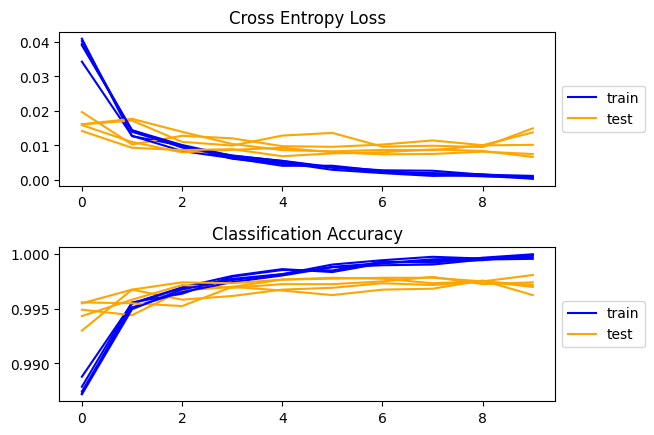

Accuracy: mean=99.718 std=0.059, n=5
Precision: mean=98.472 std=0.588, n=5
Recall: mean=98.690 std=1.029, n=5
F1 Score: mean=98.575 std=0.341, n=5
AUC Score: mean=99.986 std=0.007, n=5


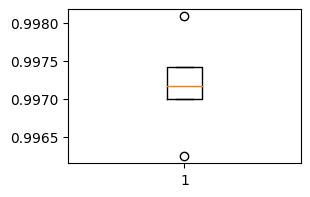

In [ ]:
learning_rate = 0.01
batch_size = 32
n_folds = 5
nr_epochs = 10

run_test_harness(n_folds, nr_epochs, batch_size, learning_rate)

### Adaptionen des Modells durch Anpassung der Hyperparameter


#### *Anpassung der Lernrate*

Die Lernrate bestimmt die Schrittweite bei der Aktualisierung der Gewichte des Modells. Wenn diese Schrittgrößen sehr groß gewählt werden (in diesem Fall: Faktor 10 größer als der Ursprungswert), kann das Modell über die optimale Lösung hinausschießen. In unserem Fall führt dies dazu, dass das Modell nichts mehr klassifizieren kann, da die Lernrate zu hoch ist.

Um dennoch ein Ergebnis zu erzielen, mussten folgende Code-Hilfszeilen implementiert werden:

```
if np.any(np.isnan(yhat_probs)):
  print("WARNING: NaN values found in yhat_probs! Thus, NANs in yhat probs set to 0.1")
  yhat_probs = np.nan_to_num(yhat_probs, nan=0.1)
```
Andernfalls hätte das Skript jedesmal bei der Berechnung des AUC-Scores abgebrochen, da NaNs produziert wurden und die Funktion damit nicht umgehen kann.


> 90.217


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> 90.433


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> 89.808


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> 90.025


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> 89.867


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


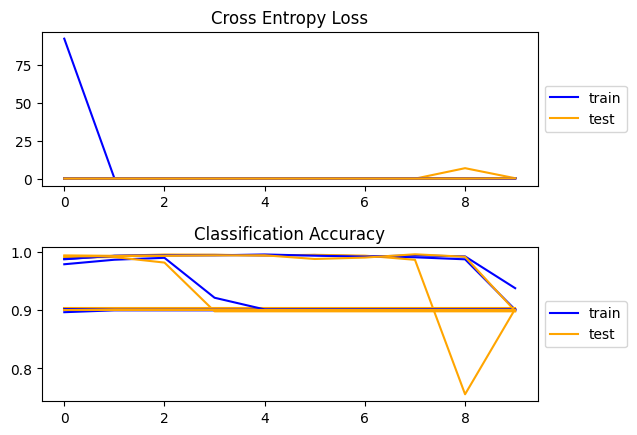

Accuracy: mean=90.070 std=0.230, n=5
Precision: mean=0.000 std=0.000, n=5
Recall: mean=0.000 std=0.000, n=5
F1 Score: mean=0.000 std=0.000, n=5
AUC Score: mean=50.000 std=0.000, n=5


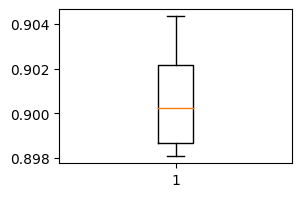

In [ ]:
# adapt learning rate and keep other hyperparameters constant
learning_rate = 0.1
batch_size = 32
n_folds = 5
nr_epochs = 10

run_test_harness(n_folds, nr_epochs, batch_size, learning_rate)

#### *Batch size 'minimiert'*

In diesem Schritt wurde die Batch-Größe minimiert. Eine zu geringe Batch-Größe kann zwar helfen, eine Überanpassung des Modells zu vermeiden, allerdings wird das Training möglicherweise unnötig in die Länge gezogen, da die Hardware nicht optimal genutzt werden kann. Zudem liefern kleinere Batches weniger repräsentative Schätzungen des Gradienten, was zu suboptimalen Gewichtsanpassungen führen kann.

> 99.675
> 99.742
> 99.733
> 99.783
> 99.750


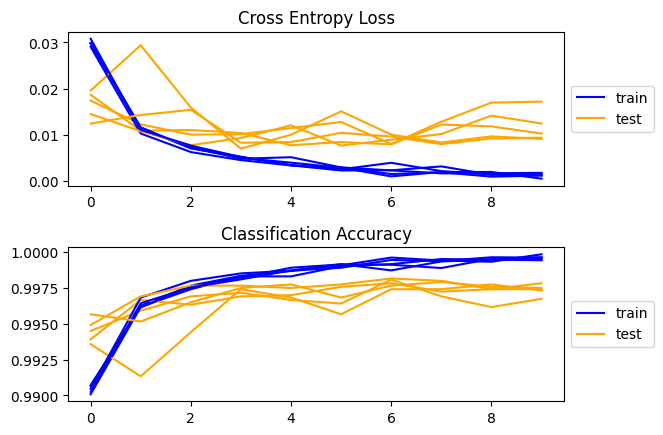

Accuracy: mean=99.737 std=0.035, n=5
Precision: mean=99.153 std=0.350, n=5
Recall: mean=98.184 std=0.217, n=5
F1 Score: mean=98.666 std=0.189, n=5
AUC Score: mean=99.967 std=0.033, n=5


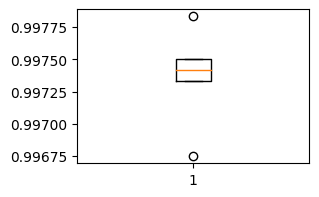

In [ ]:
# adapt batch size and keep other hyperparameters constant
learning_rate = 0.01
batch_size = 8
n_folds = 5
nr_epochs = 10

run_test_harness(n_folds, nr_epochs, batch_size, learning_rate)

#### *Batch size 'maximiert'*

In diesem Adaptierungsschritt versuchten wir, die Trainingsgeschwindigkeit stark zu erhöhen, was auch funktionierte. Die Trainingsdauer konnte um etwa 50% reduziert werden. Gleichzeitig erhöhte sich der Speicherbedarf allerdings stark, was bei unseren Trainingsdaten jedoch kein Problem darstellte. Bei deutlich größeren Bildern könnte dies jedoch den gegenteiligen Effekt auslösen, da der Speicher für die Verarbeitung möglicherweise nicht ausreicht.

Wir stellten fest, dass sich die Ergebnisse nur minimal verschlechterten:

11490434/11490434 [==============================] - 0s 0us/step
> 99.750
> 99.658
> 99.708
> 99.683
> 99.692


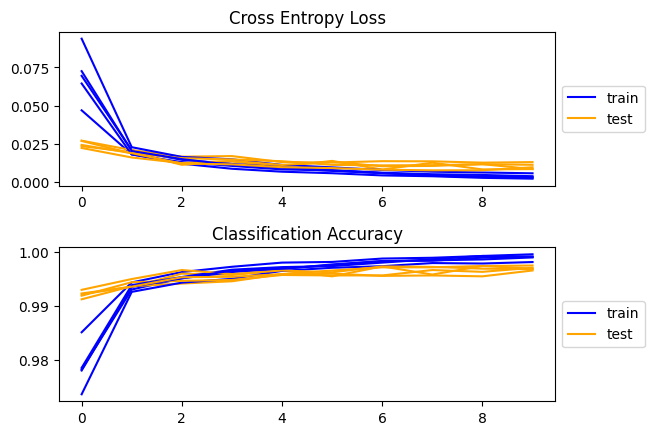

Accuracy: mean=99.698 std=0.030, n=5
Precision: mean=98.701 std=0.491, n=5
Recall: mean=98.256 std=0.406, n=5
F1 Score: mean=98.476 std=0.167, n=5
AUC Score: mean=99.976 std=0.015, n=5


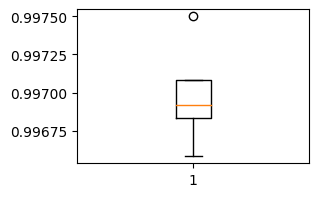

In [ ]:
# adapt batch size and keep other hyperparameters constant
learning_rate = 0.01
batch_size = 128
n_folds = 5
nr_epochs = 10

run_test_harness(n_folds, nr_epochs, batch_size, learning_rate)

#### *Number of Folds verdoppelt*

Eine Erhöhung der Anzahl der Folds kann zu einer genaueren Schätzung der Modellleistung führen, erfordert aber mehr Rechenleistung. Genau das ist hier passiert: Das Modell lief etwa doppelt so lange, brachte jedoch – zumindest in unserem Fall – keinen relevanten Mehrwert. Auch der Inhalt der Statistik hat sich kaum verändert. Daher bedeutete dieser Test für uns vor allem einen Zeitverlust:

> 99.750
> 99.783
> 99.650
> 99.817
> 99.817
> 99.817
> 99.533
> 99.767
> 99.767
> 99.833


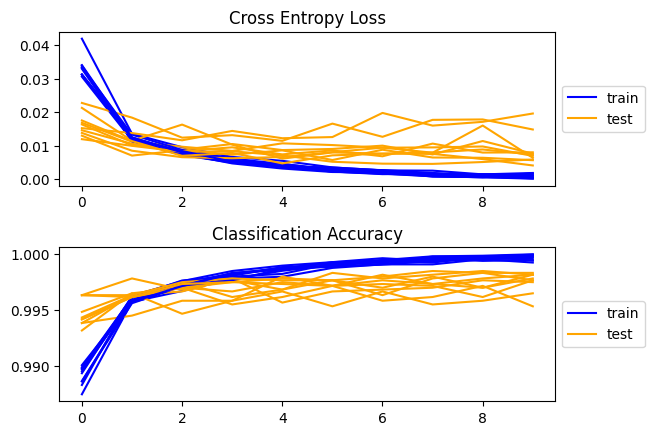

Accuracy: mean=99.753 std=0.089, n=10
Precision: mean=98.824 std=0.723, n=10
Recall: mean=98.695 std=0.338, n=10
F1 Score: mean=98.759 std=0.435, n=10
AUC Score: mean=99.982 std=0.033, n=10


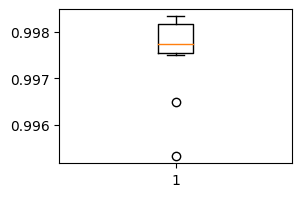

In [ ]:
# adapt number of folds and keep other hyperparameters constant
learning_rate = 0.01
batch_size = 32
n_folds = 10
nr_epochs = 10

run_test_harness(n_folds, nr_epochs, batch_size, learning_rate)

#### *Anzahl der Epochen verdoppelt*

Besonders interessant bei den Epochen ist die Beobachtung jenseits von 10 (= der ursprüngliche Wert). Wir sehen, dass 10 Epochen bereits gut gewählt waren. Danach stabilisieren sich die Kurven schnell, ohne dass es zu größeren Schwankungen kommt. Vermutlich liegt der optimale Wert für die Epochen bei maximal 11. Alles darüber könnte zu Overfitting des Modells führen. Eine irritierende Feststellung ist jedoch, dass der AUC-Score und die Genauigkeit trotz häufigerer Durchläufe auf dem Trainingsdatensatz niedriger sind als mit den ursprünglich gewählten Daten.

> 99.750
> 99.775
> 99.817
> 99.833
> 99.808


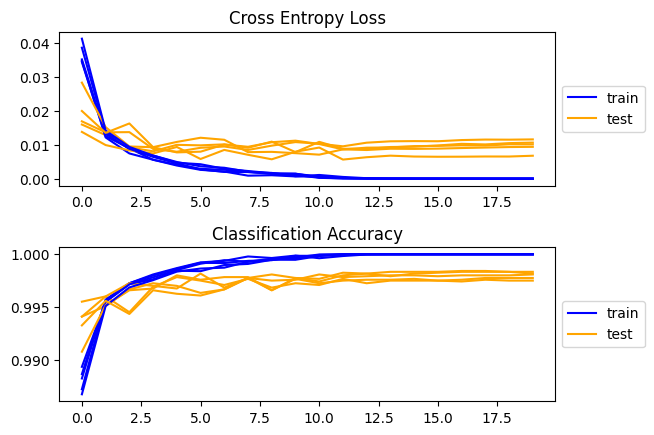

Accuracy: mean=99.797 std=0.030, n=5
Precision: mean=99.174 std=0.501, n=5
Recall: mean=98.773 std=0.296, n=5
F1 Score: mean=98.972 std=0.168, n=5
AUC Score: mean=99.987 std=0.011, n=5


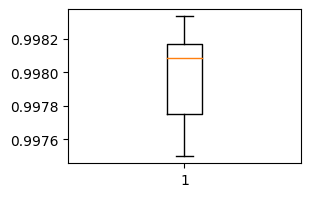

In [ ]:
# adapt number of epochs and keep other hyperparameters constant
learning_rate = 0.01
batch_size = 32
n_folds = 5
nr_epochs = 20

run_test_harness(n_folds, nr_epochs, batch_size, learning_rate)

### Evaluierung der Ergebnisse des CNN

Das CNN Modell zeigt insgesamt eine sehr gute Leistung. Die Liniendiagramme deuten kaum auf Overfitting hin, da die Kurven des Testdatensatzes (orange) nur minimal abweichen, besonders wenn man die Skala berücksichtigt.

Die Durchschnittswerte der Durchläufe sind ebenfalls sehr gut:
```
Accuracy: mean=99.783 std=0.046, n=5
Precision: mean=98.943 std=0.216, n=5
Recall: mean=98.874 std=0.285, n=5
F1 Score: mean=98.909 std=0.224, n=5
AUC Score: mean=99.991 std=0.004, n=5
```
Die Accuracy von 99.783 zeigt, dass fast alle Vorhersagen korrekt sind. Die geringe Standardabweichung von 0.046 deutet darauf hin, dass die Modelle in ihrer Genauigkeit sehr konsistent waren.

Die Precision gibt an, dass fast alle als Klasse "2" klassifizierten Bilder tatsächlich richtig klassifiziert wurden. Die etwas höhere Standardabweichung im Vergleich zur Accuracy deutet jedoch auf eine größere Variation zwischen den Modellen hin. Eine hohe Precision bedeutet, dass das Modell weniger False Positives erzeugt.

Der Recall zeigt ähnliche Werte wie die Precision, mit nur geringfügigen Unterschieden in der Standardabweichung. Ein hoher Recall bedeutet, dass das Modell weniger False Negatives produziert.

Der F1-Score ist das harmonische Mittel aus Precision und Recall. Ein hoher F1-Score deutet darauf hin, dass Precision und Recall ausgeglichen sind oder gute Werte aufweisen, was in unserem Modell der Fall ist.

Der AUC-Score von 99.991 bedeutet, dass unser Modell nahezu perfekt zwischen der Klasse "2" und "nicht 2" unterscheiden kann, was eine tolle Leistung ist.




## **Aufgabe 1.3 - Vergleich: SGD Classifier vs. CNN**

```
3. Compare both of your models? Which one is better, which one would
you recommend?
```

### Performance (Geschwindigkeitsbezogen)

Auffällig zwischen dem SGDClassifier und dem CNN ist vor allem die Performance. Auf einer CPU läuft der SGDClassifier deutlich schneller. Ergebnisse sind innerhalb von Sekunden bis Minuten verfügbar, während ein neuronales Netzwerk (CNN) mehrere Minuten bis Stunden benötigen kann. Dies liegt an der hohen Parallelität der CNNs aufgrund der vielen Neuronen pro Layer und den damit verbundenen Berechnungen. Wenn jedoch eine (leistungsstarke) GPU verfügbar ist, verringert sich dieser Unterschied etwas.

Es ist wichtig zu beachten, dass das CNN mit dem gesamten Trainingsdatensatz trainiert wurde, während der SGD Classifier nur mit einem Teil der Daten trainiert wurde (etwa einem Sechstel). Dies kann die Trainingszeit und die Gesamtdauer des Trainingsprozesses beeinflussen.

Insgesamt dauerte das Training etwa 5 Minuten unter Verwendung der TPU v2 (Tensor Processing Unit).



### Performance (Korrektheit der Klassifizierung)

**SGD Classifier**

```
Accuracy: 89.725
Precision: 82.603
Recall: 80.292
F1-Score: 81.431
AUC Score: 95.762
```

**CNN**

```
Accuracy: mean=99.783 std=0.046, n=5
Precision: mean=98.943 std=0.216, n=5
Recall: mean=98.874 std=0.285, n=5
F1 Score: mean=98.909 std=0.224, n=5
AUC Score: mean=99.991 std=0.004, n=5
```

Die oben genannten Vergleichswerte für Accuracy, Precision, Recall, F1-Score und AUC Score zeigen, dass das Convolutional Neural Network (CNN) deutlich bessere Ergebnisse erzielt hat als der SGD Classifier. Möglicherweise besteht beim CNN ein gewisses Risiko für Overfitting, aber der SGD Classifier könnte sicherlich optimiert werden, um zumindest die 90%-Grenze bei Precision und Recall zu erreichen.

Aufgrund der guten Leistung des CNN sind die Geschwindigkeitseinbußen aus unserer Sicht akzeptabel, da die Ergebnisse wirklich überzeugen.




## **Anhang / Zusatz**

### Demonstration: Geschwindigkeit bei GPU vs. CPU bei Neuronalen Netzen

*Quelle: https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=Y04m-jvKRDsJ*

Der oben genannte Geschwindigkeitsvorteil wird auch in folgendem Code von Google verdeutlicht. Hier zeigt sich ein Geschwindigkeitsvorteil von bis zu 23x zwischen TPU und CPU. Zu beachten ist, dass der erste Durchlauf eines CNN in der Regel länger dauert, da Hintergrundinitialisierungsaktivitäten stattfinden:

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.6295164189999696
GPU (s):
0.10322615200004748
GPU speedup over CPU: 35x


### Überprüfung: Verbindung mit GPU

In [ ]:
#Check, ob die Verbindung mit einer GPU besteht,
#da die Dauer der Berechnung des CNN mit einer GPU deutlich (!!) schneller von statten geht.
#CPU - 1 Durchlauf: 8 Minuten
#GPU - ALLE Durchläufe: 5-6 Minuten
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Tue Jul  9 18:42:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0              31W /  70W |   2177MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--